In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('data/total.csv')
df = df.drop(df.columns[0], axis=1)

In [5]:
df.head()

,year,city,month,overnight_stays,bezirk,nr
0,2000,Innsbruck,1,75874,I,101
1,2000,Innsbruck,2,86463,I,101
2,2000,Innsbruck,3,85461,I,101
3,2000,Innsbruck,4,78124,I,101
4,2000,Innsbruck,5,99989,I,101


In [6]:
# df.year = df.year.astype('category')
# df.city = df.city.astype('category')
# df.month = df.month.astype('category')
# df.bezirk = df.bezirk.astype('category')
# df.nr = df.nr.astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63612 entries, 0 to 63611
Data columns (total 6 columns):
year               63612 non-null int64
city               63612 non-null object
month              63612 non-null int64
overnight_stays    63612 non-null int64
bezirk             63612 non-null object
nr                 63612 non-null int64
dtypes: int64(4), object(2)
memory usage: 2.9+ MB


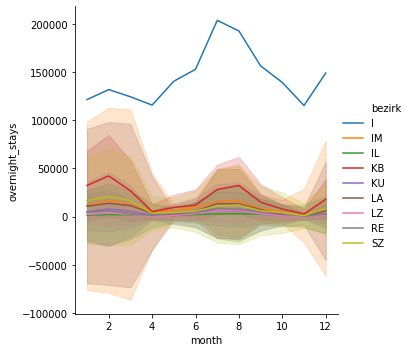

In [8]:
sns.relplot('month', 'overnight_stays',
            data=df[(df.year==2018)],
            hue='bezirk',
            kind='line',
           estimator='median',
           ci='sd')

In [38]:
len(df.city[df.bezirk=='IM'].unique())

26

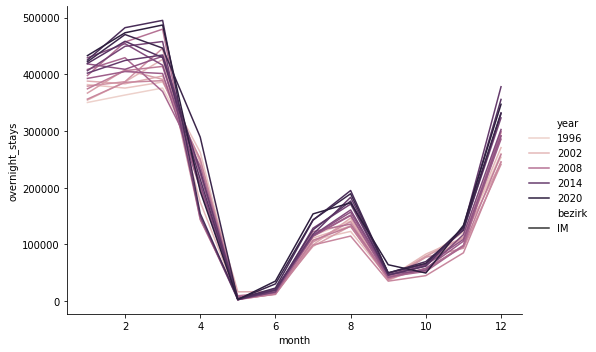

In [99]:
sns.relplot('month', 'overnight_stays',
            data=df[(df.city=='Sölden')],
            kind='line',
            hue='year',
            style='bezirk',
           aspect=1.5)

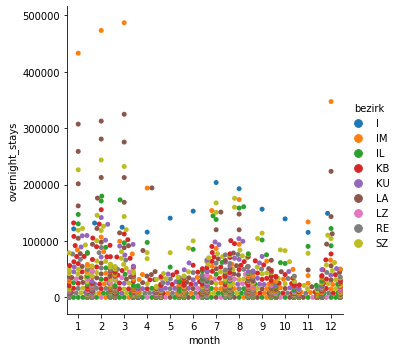

In [67]:
sns.catplot('month', 'overnight_stays', data=df[df.year==2018], hue='bezirk', kind='swarm')

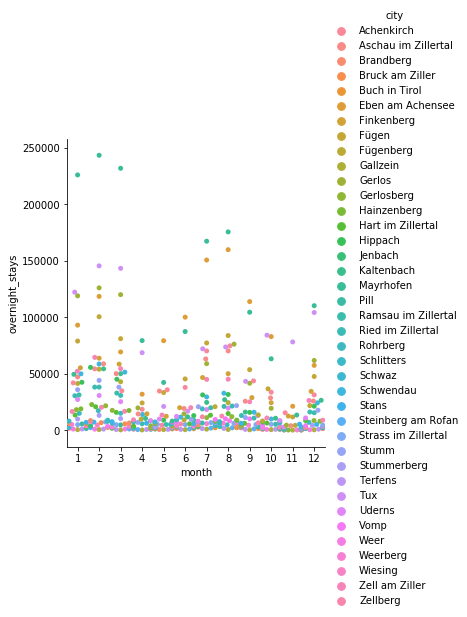

In [68]:
sns.catplot('month', 'overnight_stays',
            data=df[(df.year==2018) & (df.bezirk=='SZ')],
            hue='city', kind='swarm'
           )

In [42]:
sölden_2000 = df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].values

In [43]:
sölden_2018 = df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].values

In [44]:
sölden_2018 - sölden_2000

array([ 82563, 109715, 111068, -56784,  -2931,  13621,  38617,  31708,
        14860, -17255,  19631,  86990], dtype=int64)

In [45]:
df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].describe()

count        12.000000
mean     176284.166667
std      137304.871243
min        5735.000000
25%       62587.250000
50%      128522.000000
75%      282668.250000
max      375762.000000
Name: overnight_stays, dtype: float64

In [46]:
df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].describe()

count        12.000000
mean     212267.750000
std      177129.011809
min        2804.000000
25%       60657.000000
50%      163684.500000
75%      368551.500000
max      486830.000000
Name: overnight_stays, dtype: float64

In [47]:
df.overnight_stays[(df.year==2018) & (df.city=='Sölden')].describe() - df.overnight_stays[(df.year==2000) & (df.city=='Sölden')].describe()

count         0.000000
mean      35983.583333
std       39824.140566
min       -2931.000000
25%       -1930.250000
50%       35162.500000
75%       85883.250000
max      111068.000000
Name: overnight_stays, dtype: float64

In [48]:
df_year_total = df.groupby([df.year, df.city, df.bezirk], as_index=False)['overnight_stays'].sum()

In [49]:
df_year_total = pd.DataFrame(df_year_total)

In [50]:
df_year_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5301 entries, 0 to 5300
Data columns (total 4 columns):
year               5301 non-null int64
city               5301 non-null object
bezirk             5301 non-null object
overnight_stays    5301 non-null int64
dtypes: int64(2), object(2)
memory usage: 207.1+ KB


In [51]:
df_year_total.head()

,year,city,bezirk,overnight_stays
0,2000,Abfaltersbach,LZ,4462
1,2000,Absam,IL,21976
2,2000,Achenkirch,SZ,332107
3,2000,Ainet,LZ,5006
4,2000,Aldrans,IL,26002


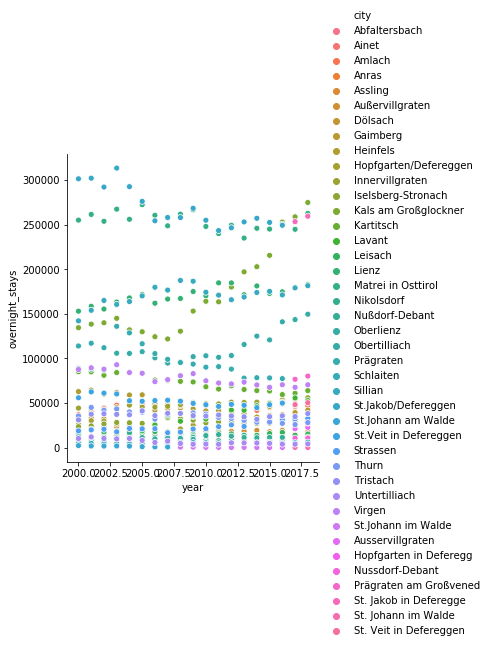

In [52]:
sns.relplot('year', 'overnight_stays', data=df_year_total[df_year_total.bezirk=='LZ'], hue='city')

In [53]:
df_year_total[df_year_total.year==2000].sort_values('overnight_stays', ascending=False).head(10).reset_index()

,index,year,city,bezirk,overnight_stays
0,233,2000,Sölden,IM,2115410
1,132,2000,Mayrhofen,SZ,1300382
2,88,2000,Innsbruck,I,1196946
3,90,2000,Ischgl,LA,1178438
4,205,2000,Seefeld in Tirol,IL,1144912
5,148,2000,Neustift im Stubaital,IL,1102303
6,212,2000,St.Anton am Arlberg,LA,958952
7,108,2000,Kirchberg in Tirol,KB,893218
8,34,2000,Eben am Achensee,SZ,875277
9,247,2000,Tux,SZ,829953


In [80]:
top_10_2018_total = df_year_total[df_year_total.year==2018].sort_values('overnight_stays', ascending=False).head(5).reset_index()
top_10_2018_total = top_10_2018_total.drop('index', axis=1)

In [81]:
top_10_2018_total

,year,city,bezirk,overnight_stays
0,2018,Sölden,IM,2547213
1,2018,Innsbruck,I,1742761
2,2018,Mayrhofen,SZ,1545397
3,2018,Ischgl,LA,1534861
4,2018,Neustift im Stubaital,IL,1310549


In [82]:
top_10_2018 = df[(df.city.isin(top_10_2018_total.city)) & (df.year==2018)]

Text(0.5, 1, 'Nächtigungen Tirol 2018,\n Top 5 Gemeinden nach Gesamtnächtigungen')

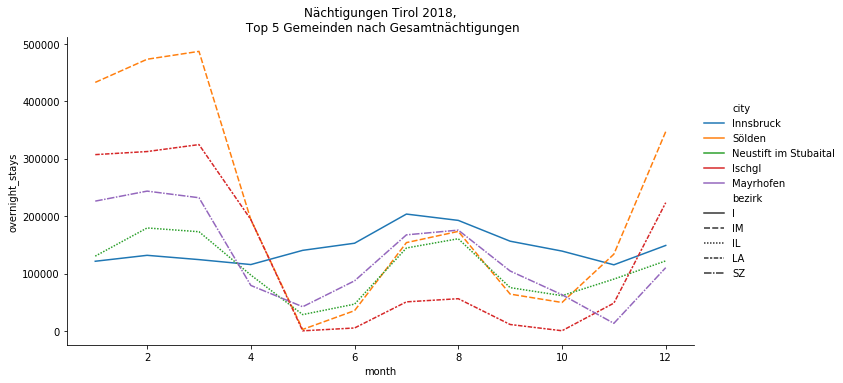

In [102]:
sns.relplot('month', 'overnight_stays', data=top_10_2018, kind='line', hue='city', style='bezirk', aspect=2)
plt.title('Nächtigungen Tirol 2018,\n Top 5 Gemeinden nach Gesamtnächtigungen')